## Class activation mapping visualization


In [ ]:
# Sample code of Pytorch-Grad-CAM
import torch
import torchvision
from torchvision.models import resnet50, ResNet50_Weights
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

from kernels import EdgeDetection, Blur, Sharpen, forward, tensor4plt, normalize_tensor, plot_tensors

model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
target_layers = [model.layer4[-1]]

# Get rgb_img
path = "grasshopper.jpeg"
rgb_img = torchvision.io.read_image(path)
rgb_img = rgb_img.view(1, rgb_img.shape[0], rgb_img.shape[1], rgb_img.shape[2]).type(torch.float32)

# Get grayscale
# torchvision.transforms.Grayscale(num_output_channels=1)(rgb_img)

# We have to specify the target we want to generate the CAM for.
targets = [ClassifierOutputTarget(311)]

# Construct the CAM object once, and then re-use it on many images.
with GradCAM(model=model, target_layers=target_layers) as cam:
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=rgb_img, targets=targets)

    # In this example grayscale_cam has only one image in the batch:
    print(grayscale_cam.shape)
    grayscale_cam = grayscale_cam
    
    grayscale_cam = grayscale_cam[0, :]
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    
    # You can also get the model outputs without having to redo inference
    model_outputs = cam.outputs

    plot_tensors(
        column = 2,
        Image = grayscale_cam
    )
    rgb_img.shape

(1, 159, 158)


TypeError: max() received an invalid combination of arguments - got (axis=NoneType, out=NoneType, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: axis, out
 * (name dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: axis, out


In [ ]:
model.

## Kernels visualization


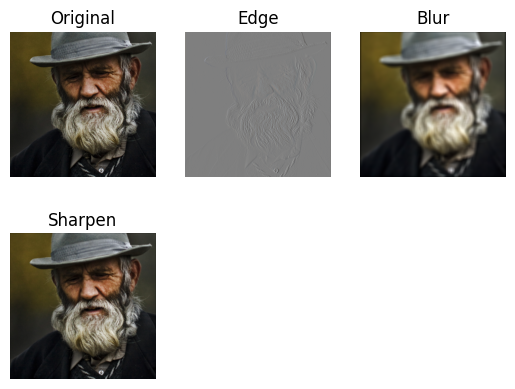

In [9]:
from kernels import EdgeDetection, Blur, Sharpen, forward, tensor4plt, normalize_tensor, plot_tensors

if __name__ == "__main__":
    import torchvision
    import torch

    # Đọc ảnh và chuẩn bị tensor
    path = "my_img.jpg"
    tensor_img = torchvision.io.read_image(path)
    tensor_img = tensor_img.view(1, tensor_img.shape[0], tensor_img.shape[1], tensor_img.shape[2]).type(torch.float32)

    # Áp dụng kernel
    images = [tensor_img,
              forward(tensor_img, EdgeDetection.sobel_x),
              forward(tensor_img, Blur.custom_mean_kernel(25)),
              forward(tensor_img, Sharpen.custom_sharpen(7, 25))]

    # Chuẩn hóa ảnh về khoảng [0, 1]
    for i in range(len(images)):    
        images[i] = normalize_tensor(images[i])

    # Plot ảnh
    plot_tensors(column = 3,
                 Original = images[0], Edge = images[1], Blur = images[2],
                 Sharpen = images[3])